# Web Scraping workshop

In [1]:
import bs4 
from urllib.request import Request, urlopen
from PIL import Image

In [2]:
#print(webpage)





### Below are two images of the site we are going to scrape:
> 1. inspected site: the html we recieve as a result of what is being displayed
> 2. surce code: the .html file saved on the network, without any JS-DOM element

The reason why we are discussing this is many elements in a dynamic websites are DOM elements and are introduced as a result of the various options that are chosen by the user


### In this workshop we are going to demonstrate two ways: 
>  1. using a selenium webdriver
>  2. using BeautifulSoup and other frameworks




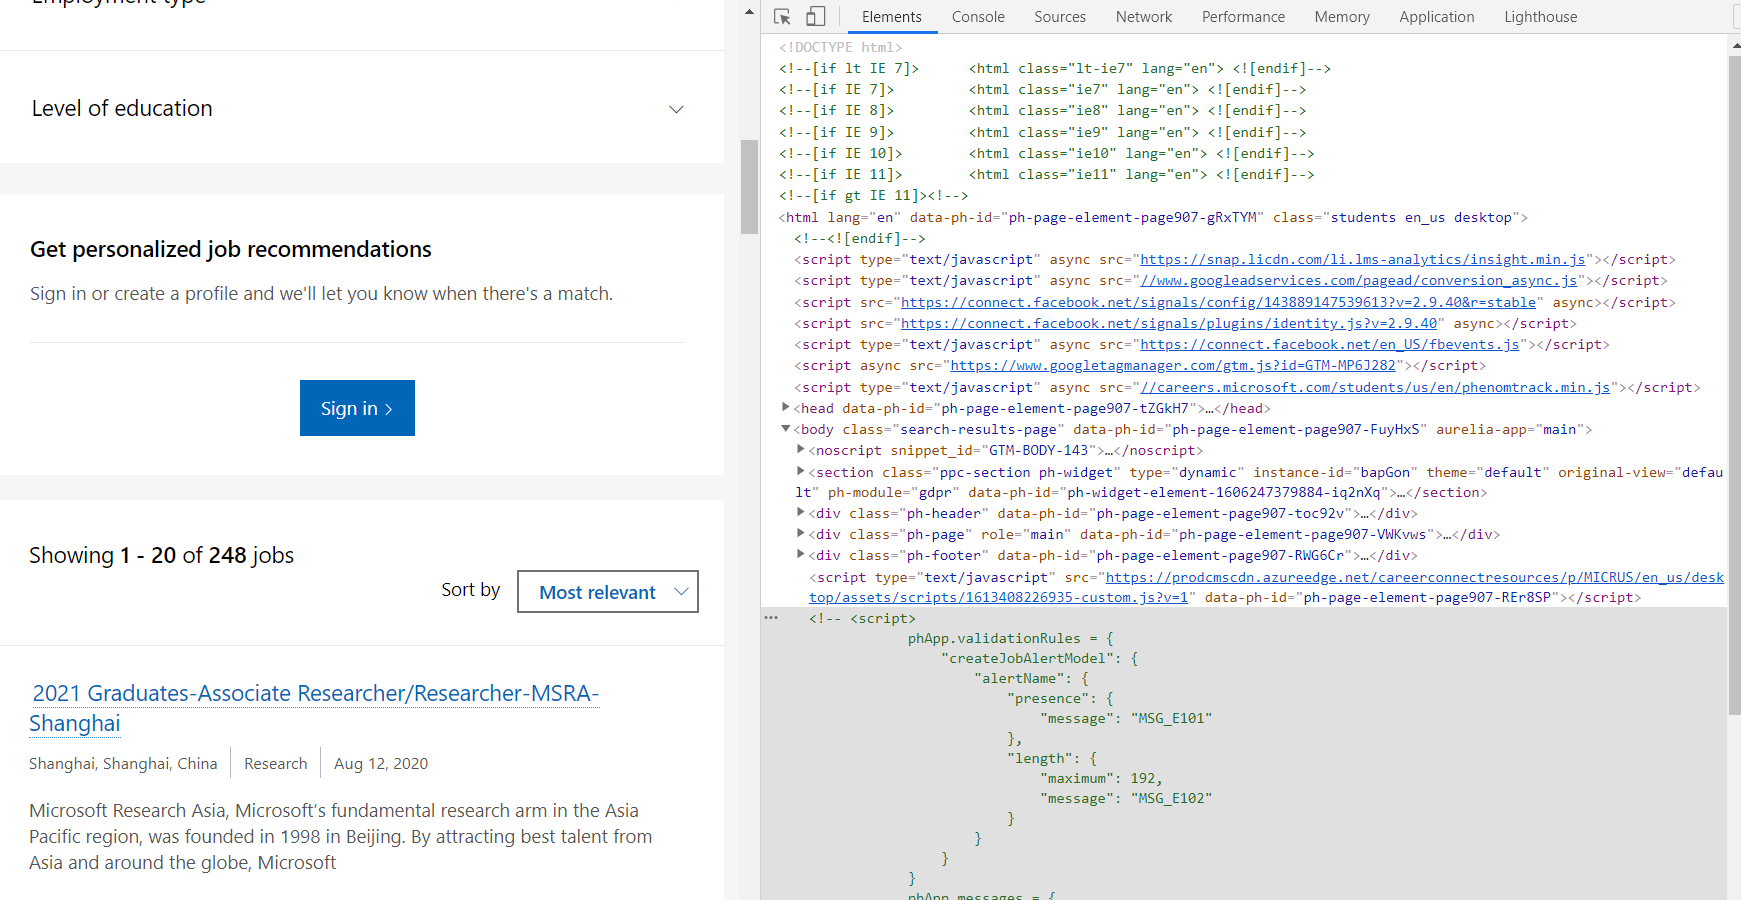

In [3]:
Image.open('./assets/inspect-image.png')


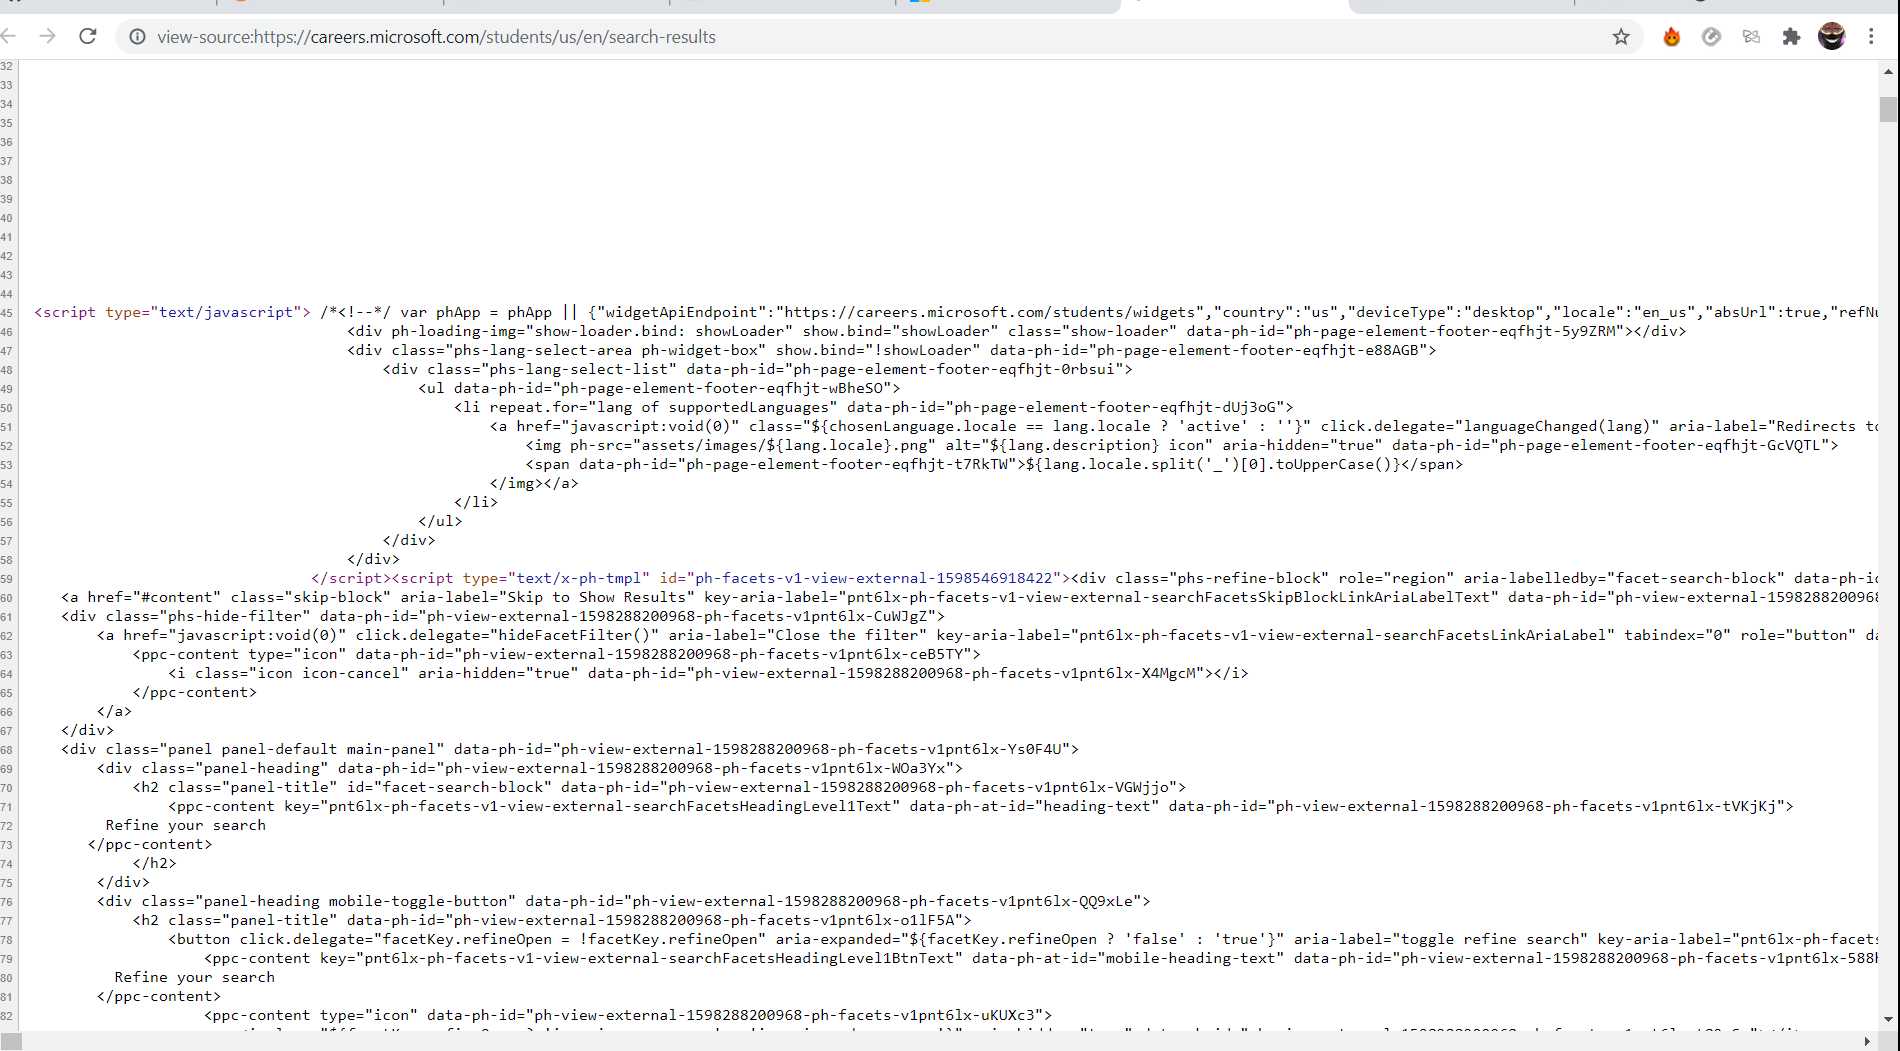

In [4]:
Image.open('./assets/source-code.png')

### 1. basic trial : Using BeautifulSoup

In [5]:
url = 'https://careers.microsoft.com/students/us/en/search-results'
req = urlopen(url)
webpage = req.read().decode('utf-8')

> 1. load the website and read its html content (the html recieved would be raw html file)
> 2. read the path which leads to the element you want to extract 
> 3. problem is in the raw file we would not get the path to the elements we want

In [6]:
file = bs4.BeautifulSoup(webpage, 'html.parser')
#print(file)
#check the path from the pointed section but remember this path is of the inspected html file 
#use it as css selector i.e. .class_name, #id_name, .class1.class2.class3 (for elements with multiple classes) ,etc.

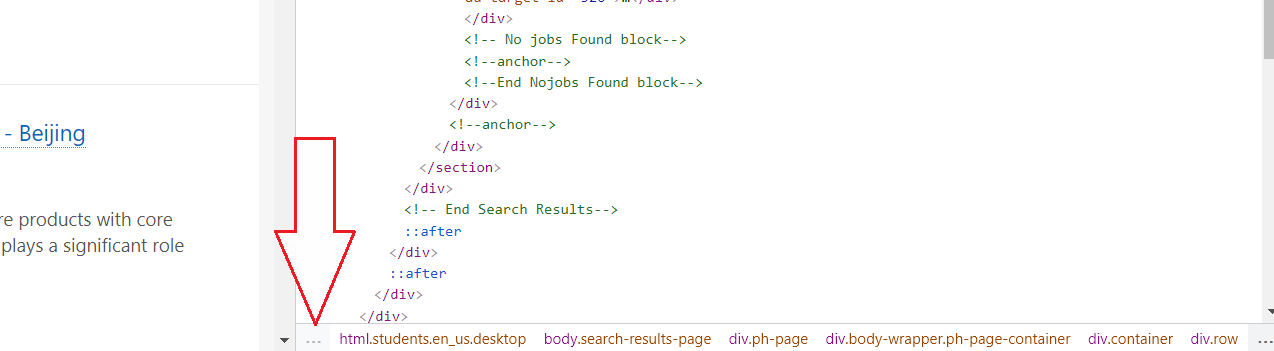

In [7]:
Image.open('./assets/path_print.png')

In [8]:
file.select('''
.students.en_us.desktop
.search-results-page
.ph-page
.body-wrapper.ph-page-container
.container
.row
.col-md-8.col-sm-7
''')

# this is not the complete path as if you inspect will find out it has 
# still not 1 but many path still to the element we want to get the data from
# therefore proving our initial point

[<div class="col-md-8 col-sm-7" data-ph-id="ph-page-element-page907-yisEWG">
 <section class="ph-widget" data-ph-id="ph-page-element-page907-SJ3kiy" instance-id="fwmx92" original-view="view-external" view="fwmx92-view-external">
 <div as-element="ph-search-results-v1" bulkcart.bind="true" class="ph-search-results-v1-view-external-default ph-widget-target" data-ph-id="ph-page-element-page907-DeY6Ta" data-widget="ph-search-results-v1" instance-id="fwmx92" is-error-msg-reqd.bind="true" original-view="view-external" view="view-external-1599163299078"></div>
 </section>
 </div>]

### 2. using Selenium web driver

In [9]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait


### Steps for the process:
> 1. setup the driver
> 2. the driver works because it stimulates the browser and extracts the html from the page after it is loaded
> 3. Also we can stimulate clicks and other touch actions like tap, double tap, flick, scroll, etc
> 4. lastly we really promote you to read documentations for working with it, it really helps as it has a lot of very long functons and remembering all of them will not be as fruitful 

In [10]:
os.environ['WDM_LOG_LEVEL'] = '0'
driver = webdriver.Chrome(ChromeDriverManager().install())
search_url='https://careers.microsoft.com/students/us/en/search-results'
driver.get(search_url)

#### explaination of above lines:
> 1. os.environ['WDM_LOG_LEVEL'] = '0' : it is used to block any log messages from the operating system, we are dealing with stimulating a program, so working status logs are possible
2. driver = webdriver.Chrome(ChromeDriverManager().install()) : this statement install ChromeDriver, if you have it installed just use the path as an argument 'webdriver.Chrome(PATH)'
3. search_url='https://careers.microsoft.com/students/us/en/search-results' :this is the url that we are going to scrape
4. driver.get(search_url) : this is a API-get request to the site which returns the html of the website as a result

Now work with the site that just opened up and make sure you understand how all the elements work
##### also adjust the window sizes because functionality of certain elements changes when we change window sizes
> 1. The next function is a very good example of the above statement
>> 1. In the left side of the screen there is a section labelled "Refine Your Search"  
>> 2. it becomes a drop down section when the window size is decreased sufficiently

1. The complex error handling is due to the fact that if we try to access any element that is not visible at the moment it would throw an error and the whole program will halt 
2. To make sure that does not happen we use error handling,
3. but as a result of our error handling we also won't be able to interrupt the program if we found that there is a fault in our program


  The work flow of our program would be:
  

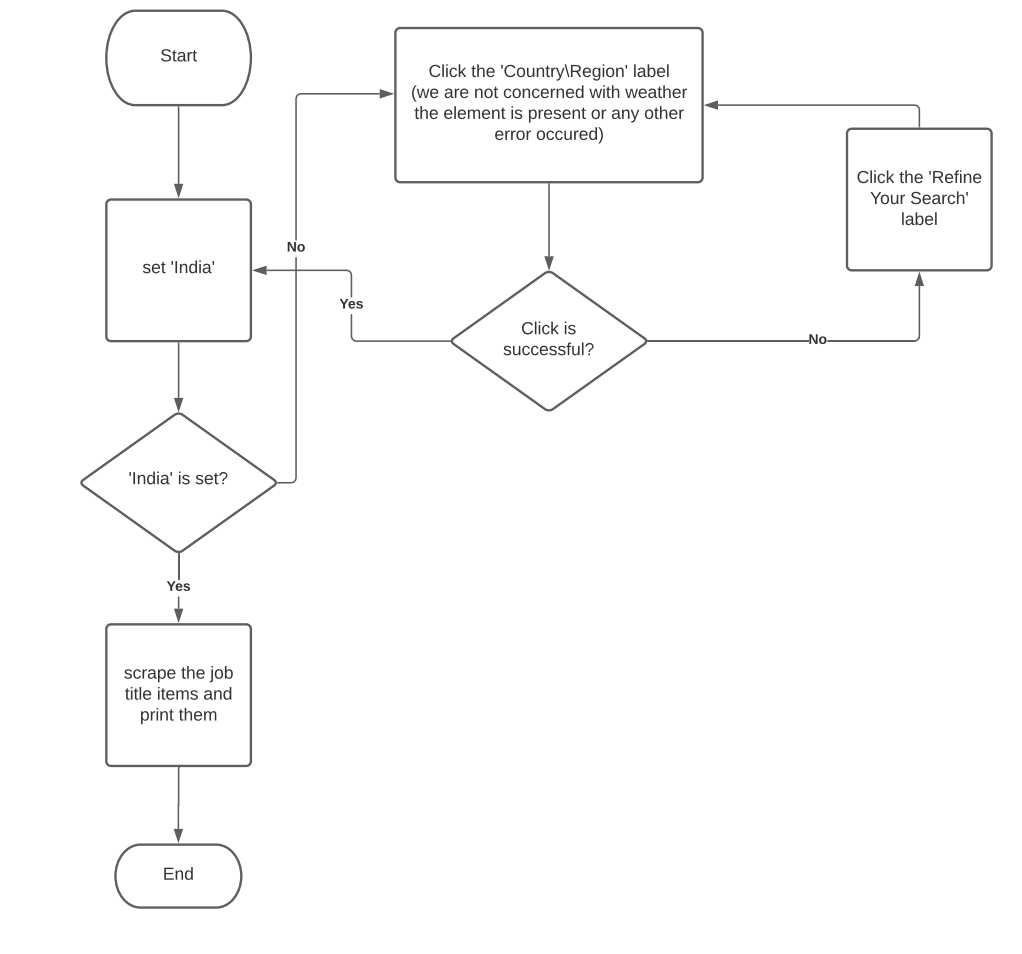

In [11]:
 Image.open('./assets/work-flow.png')

### In this section we can see from the flow-char there are 4 processes:
1. set 'India' : done by the function : setCountry(driver)
2. click Country/Region label : done by function dropDown(driver)
3. click 'Refine your Search' label: done by function openOptions(driver)
4. scrape the job title items and print them: getList(driver)


In [12]:
def openOptions(driver):
    try:
        driver.find_element_by_xpath("//button[@aria-label='toggle refine search']").click()
        return True
    except KeyboardInterrupt:
        driver.quit()
        return False
    except:
        return True

In [13]:
def dropDown(driver):
    try:
        driver.find_element_by_xpath("//button[@aria-label='Country/Region']").click()
        return True
    except KeyboardInterrupt:
        driver.quit()
        return False
    except:
        WebDriverWait(driver, timeout = 10).until(openOptions)

In [14]:
def setCountry(driver):
    try:
        driver.find_element_by_xpath("//label[input/@data-ph-at-text='India']").click()
        return True
    except:
        WebDriverWait(driver, timeout=10).until(dropDown)
        setCountry(driver)

In [15]:
def getList(driver):
    try:
        setCountry(driver)
        time.sleep(3)
        text = driver.find_element_by_xpath("//ul[@data-ph-at-id='jobs-list']")
        listItems = text.find_elements_by_tag_name('li')
        for items in listItems:
            print('========================')
            print(items.text)
            print('========================')
        return True
    except KeyboardInterrupt:
        driver.quit()
        return False
    except:
        getList(driver)

In [16]:
print("wait...")
getList(driver)

wait...
Research Intern
Bangalore, Karnataka, India
Research
Jan 18, 2021
Interns put inquiry and theory into practice. Working with some of the world’s best researchers, interns learn, collaborate, and network for life. Interns not only advance their own careers, but
Save
Post Doc Researcher
Bangalore, Karnataka, India
Research
Jul 15, 2020
The Microsoft Research India Post-doctoral Researcher program brings together fresh PhDs from all over the world with our researchers. It provides the post-doctoral researchers the opportunity to work
Save
SCAI Centre Fellow
Bangalore, Karnataka, India
Research
Jan 22, 2020
Microsoft Research India invites applications for its AI Centre Postdoctoral Fellows Program.Candidates who have completed their PhDs are eligible to apply. Submit your application now for early
Save


True